<a href="https://colab.research.google.com/github/leonardoLavagna/PyTorch-Notebooks/blob/main/Notebook_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Notebook 6
## Neural Networks and Activation Functions and Digit Recognition
In this notebook we will breafly discuss the basic structure of a neural network and the use of activation functions.

## Neural Networks
An artificial neural network are computing systems inspired by the biological neural networks that constitute animal brains, see https://en.wikipedia.org/wiki/Artificial_neural_network for all the details. There are many types of neural networks (sequential, recursive, convolutional,...), we will study in detail some of them by writing PyTorch code. The most important thing to keep in mind is that neural networks are a layered structure, as shown in the following picture.  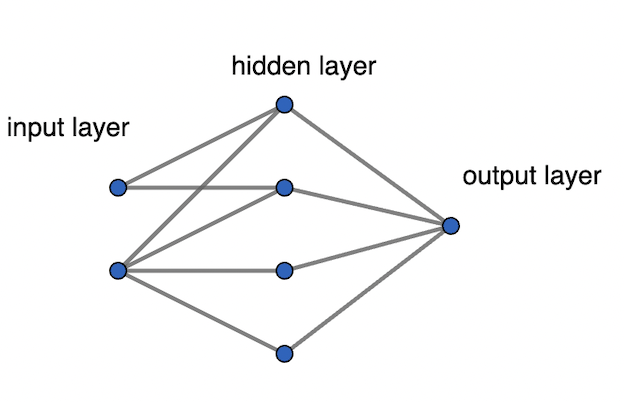

In [ ]:
# Standard PyTorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F

**Remark .** The module nn contains all the basic functionalities of neural networks, see https://pytorch.org/docs/stable/nn.html.

**Remark .** We'll be using Python classes to create bits and pieces for building neural networks. If you're unfamiliar with Python class notation, see https://realpython.com/python3-object-oriented-programming.

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size):
        super(NeuralNet,self).__init__()
        # Linear activation function
        self.linear1 = nn.Linear(input_size,hidden_size)
        # Relu activation function
        self.relu = nn.ReLU()
        # Linear activation function
        self.linear2 = nn.Linear(hidden_size, 1)
        # Sigmoid activation function
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out 

**Remark .** Activation functions are discussed in the next section.

In [ ]:
# second way: use directly activation functions
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size):
        super(NeuralNet,self).__init__()
        self.linear1 = nn.Linear(input_size,hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self,x):
        out = torch.relu(self.linear1(x)) # or F.relu
        out = torch.sigmoid(self.linear2(out))
        return out 


## Activation Functions
Activation functions are a crucial ingredient of neural networks. There are many types of activation functions, both linear and non-linear. Some common choices are:
*   Linear Function
*   Binary Step Function
*   Sigmoid
*   Tanh
*   ReLU
*   Leaky ReLU
See https://en.wikipedia.org/wiki/Activation_function for more details. In the following code we see some of the activation functions we will use the most.

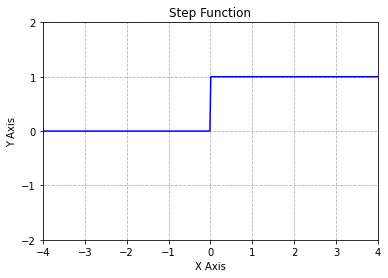

In [ ]:
# Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)
plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Step Function')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2, 2)
plt.xlim(-4, 4)
plt.show()

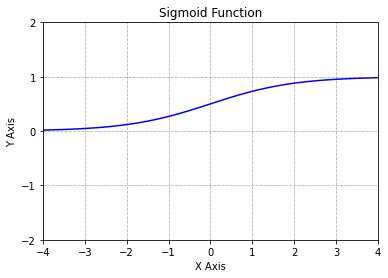

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,100)
fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2, 2)
plt.xlim(-4, 4)
plt.show()
fig = plt.figure()

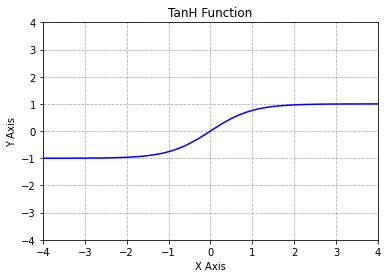

<Figure size 432x288 with 0 Axes>

In [ ]:
# TanH
tanh = lambda x: 2*sigmoid(2*x)-1
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,100)
plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('TanH Function')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
fig = plt.figure()

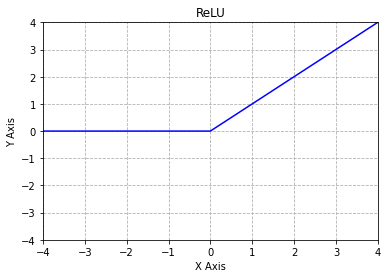

<Figure size 432x288 with 0 Axes>

In [ ]:
# ReLU
relu = lambda x: np.where(x>=0, x, 0)
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)
plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
fig = plt.figure()

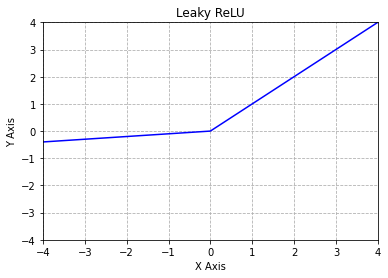

<Figure size 432x288 with 0 Axes>

In [ ]:
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)
plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Leaky ReLU')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
fig = plt.figure()

## Application: Digit Recognition
In this section we build an image recognition system, that tryies to recognize hand written digits, and that is based on the famous MNIST dataset (see https://pytorch.org/vision/stable/datasets.html). 

In [ ]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



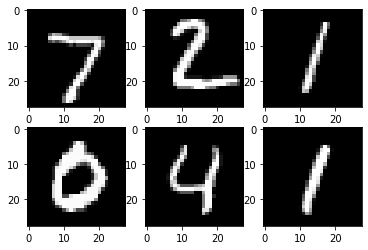

In [ ]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Epoch [1/2], Step [100/600], Loss: 0.5169
Epoch [1/2], Step [200/600], Loss: 0.3427
Epoch [1/2], Step [300/600], Loss: 0.2383
Epoch [1/2], Step [400/600], Loss: 0.2031
Epoch [1/2], Step [500/600], Loss: 0.2421
Epoch [1/2], Step [600/600], Loss: 0.2663
Epoch [2/2], Step [100/600], Loss: 0.0704
Epoch [2/2], Step [200/600], Loss: 0.0347
Epoch [2/2], Step [300/600], Loss: 0.1034
Epoch [2/2], Step [400/600], Loss: 0.1630
Epoch [2/2], Step [500/600], Loss: 0.1206
Epoch [2/2], Step [600/600], Loss: 0.0697
Accuracy of the network on the 10000 test images: 97.05 %
